In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [767]:
df = pd.read_csv('../csv/football_players.csv')
df.head()

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0,0,0,178,...,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0,0,0,188,...,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0,0,0,183,...,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0,0,0,170,...,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0,0,0,181,...,1,1,1,1,1,1,1,1,1,1


In [768]:
df = df.drop(['UID', 'Name', 'NationID', 'Born', 'IntCaps', 'IntGoals', 'U21Caps', 'U21Goals', 'PositionsDesc',
              'Consistency', 'Dirtiness', 'ImportantMatches', 'InjuryProness', 'Versatility', 'Adaptability', 
              'Ambition', 'Loyalty', 'Pressure', 'Professional', 'Sportsmanship', 'Temperament','Controversy', 
              'AerialAbility','CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
              'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing'], axis=1)
df.shape

(159541, 56)

In [769]:
filt_dm = (df['DefensiveMidfielder'] == 20)
filt_wbl = (df['WingBackLeft'] == 20)
filt_wbr = (df['WingBackRight'] == 20)

df.loc[filt_dm, ['MidfielderCentral']] = 20
df.loc[filt_wbl, ['DefenderLeft']] = 20
df.loc[filt_wbr, ['DefenderRight']] = 20

df.shape

(159541, 56)

In [770]:
df.head()

,Age,Height,Weight,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,36,178,79,3,8,6,9,12,4,4,...,1,1,1,1,20,20,1,1,1,1
1,34,188,90,3,1,2,3,1,6,1,...,1,1,1,1,1,1,1,1,1,1
2,34,183,70,3,3,2,4,10,3,1,...,1,1,1,1,20,20,1,1,1,1
3,31,170,65,3,2,6,7,9,3,13,...,1,1,1,1,1,1,1,1,1,1
4,33,181,70,1,1,2,12,5,1,12,...,1,1,1,1,1,1,1,1,1,1


In [771]:
df = df.drop(df[df.Goalkeeper == 20].index)
df.shape

(142411, 56)

In [772]:
df = df.drop(df[df.Sweeper == 20].index)
df.shape

(142157, 56)

In [773]:
df = df.drop(['Goalkeeper', 'Sweeper', 'DefensiveMidfielder', 'WingBackLeft', 'WingBackRight'], axis=1)
df.shape

(142157, 51)

In [774]:
pos_list = ['Striker', 'AttackingMidCentral',
       'AttackingMidLeft', 'AttackingMidRight', 'DefenderCentral',
       'DefenderLeft', 'DefenderRight',
       'MidfielderCentral', 'MidfielderLeft', 'MidfielderRight']

In [780]:
# df_pos_arr = []

# for row in range(df.shape[0]):
    
#     pos_ind = int(np.where(df.iloc[row, -10:].values == 20)[0][0])
#     df_pos_arr.append(pos_list[pos_ind])


In [782]:
df_pos_arr[0:10]

['MidfielderCentral',
 'MidfielderCentral',
 'Striker',
 'Striker',
 'DefenderRight',
 'MidfielderCentral',
 'MidfielderRight',
 'DefenderCentral',
 'AttackingMidCentral',
 'MidfielderCentral']

In [783]:
df.shape

(142157, 51)

In [784]:
len(df_pos_arr)


142157

In [785]:
df.head()

,Age,Height,Weight,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,...,Striker,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,MidfielderCentral,MidfielderLeft,MidfielderRight
0,36,178,79,3,8,6,9,12,4,4,...,1,1,1,1,1,1,1,20,1,1
2,34,183,70,3,3,2,4,10,3,1,...,1,1,1,1,1,1,1,20,1,1
3,31,170,65,3,2,6,7,9,3,13,...,20,1,1,1,1,1,1,1,1,1
4,33,181,70,1,1,2,12,5,1,12,...,20,1,1,1,1,1,1,1,1,1
5,31,175,68,3,5,4,1,7,1,2,...,1,1,1,1,1,1,20,1,1,1


In [788]:
df = df.reset_index()

In [789]:
df = pd.concat([df, pd.Series(df_pos_arr)], axis=1)
df.shape


(142157, 53)

In [791]:
df = df.rename(columns={0:'Position'})
df.head()

,index,Age,Height,Weight,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,...,AttackingMidCentral,AttackingMidLeft,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,MidfielderCentral,MidfielderLeft,MidfielderRight,Position
0,0,36,178,79,3,8,6,9,12,4,...,1,1,1,1,1,1,20,1,1,MidfielderCentral
1,2,34,183,70,3,3,2,4,10,3,...,1,1,1,1,1,1,20,1,1,MidfielderCentral
2,3,31,170,65,3,2,6,7,9,3,...,1,1,1,1,1,1,1,1,1,Striker
3,4,33,181,70,1,1,2,12,5,1,...,1,1,1,1,1,1,1,1,1,Striker
4,5,31,175,68,3,5,4,1,7,1,...,1,1,1,1,1,20,1,1,1,DefenderRight


In [792]:
df.columns

Index(['index', 'Age', 'Height', 'Weight', 'Corners', 'Crossing', 'Dribbling',
       'Finishing', 'FirstTouch', 'Freekicks', 'Heading', 'LongShots',
       'Longthrows', 'Marking', 'Passing', 'PenaltyTaking', 'Tackling',
       'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decisions', 'Determination', 'Flair',
       'Leadership', 'OffTheBall', 'Positioning', 'Teamwork', 'Workrate',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot',
       'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength', 'Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight', 'MidfielderCentral',
       'MidfielderLeft', 'MidfielderRight', 'Position'],
      dtype='object')

In [793]:
df = df.drop(['Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight', 'MidfielderCentral',
       'MidfielderLeft', 'MidfielderRight'], axis=1)
df.shape

(142157, 43)

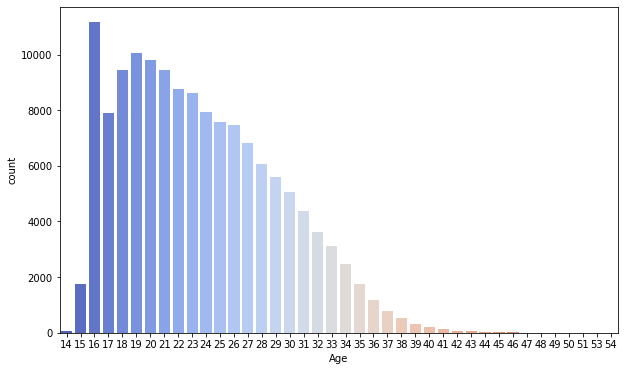

In [794]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Age'], palette='coolwarm')


In [795]:
df = df.drop((df[df['Age'] > 35].index))
df.shape

(138823, 43)

In [796]:
df = df.drop((df[df['Age'] < 17].index))
df.shape

(125855, 43)

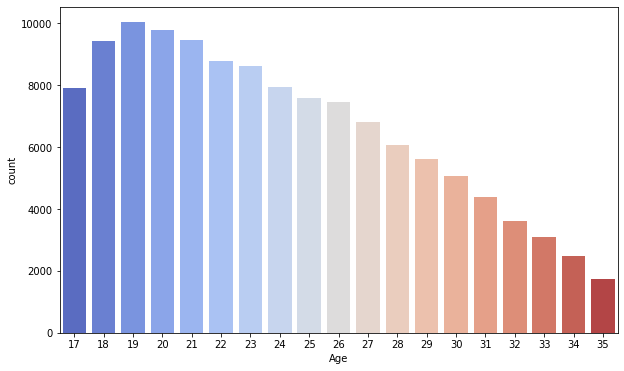

In [797]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Age'], palette='coolwarm')


In [798]:
df.columns

Index(['index', 'Age', 'Height', 'Weight', 'Corners', 'Crossing', 'Dribbling',
       'Finishing', 'FirstTouch', 'Freekicks', 'Heading', 'LongShots',
       'Longthrows', 'Marking', 'Passing', 'PenaltyTaking', 'Tackling',
       'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decisions', 'Determination', 'Flair',
       'Leadership', 'OffTheBall', 'Positioning', 'Teamwork', 'Workrate',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot',
       'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength',
       'Position'],
      dtype='object')

In [801]:
df = df.drop('index', axis=1)
df.shape

(125855, 42)

In [815]:
df.head()

,Age,Height,Weight,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,...,Agility,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Position
1,34,183,70,3,3,2,4,10,3,1,...,4,4,8,5,8,6,20,4,9,MidfielderCentral
2,31,170,65,3,2,6,7,9,3,13,...,7,2,6,2,8,7,20,6,6,Striker
3,33,181,70,1,1,2,12,5,1,12,...,4,2,6,5,5,8,20,2,5,Striker
4,31,175,68,3,5,4,1,7,1,2,...,6,2,7,5,9,9,20,11,7,DefenderRight
5,32,176,72,9,11,11,6,12,7,7,...,10,12,6,9,12,8,20,13,8,MidfielderCentral


In [836]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.Position)
df['Label'] = le.transform(df.Position)

In [841]:
df.head()

,Age,Height,Weight,Corners,Crossing,Dribbling,Finishing,FirstTouch,Freekicks,Heading,...,Balance,Jumping,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Position,Label
1,34,183,70,3,3,2,4,10,3,1,...,4,8,5,8,6,20,4,9,MidfielderCentral,6
2,31,170,65,3,2,6,7,9,3,13,...,2,6,2,8,7,20,6,6,Striker,9
3,33,181,70,1,1,2,12,5,1,12,...,2,6,5,5,8,20,2,5,Striker,9
4,31,175,68,3,5,4,1,7,1,2,...,2,7,5,9,9,20,11,7,DefenderRight,5
5,32,176,72,9,11,11,6,12,7,7,...,12,6,9,12,8,20,13,8,MidfielderCentral,6


In [840]:
np.sum(df.isnull().sum())

0

In [842]:
X = df.drop(['Position', 'Label'], axis=1).values
y = df['Label'].values

In [843]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [844]:
scaler = MinMaxScaler()

In [845]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [846]:
model = Sequential()

model.add(Dense(66, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [847]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=256, epochs=50)

Epoch 1/50
345/345 [==============================] - 2s 4ms/step - loss: 1.3865 - val_loss: 0.8391
Epoch 2/50
345/345 [==============================] - 1s 3ms/step - loss: 0.8813 - val_loss: 0.7494
Epoch 3/50
345/345 [==============================] - 1s 3ms/step - loss: 0.8208 - val_loss: 0.7237
Epoch 4/50
345/345 [==============================] - 1s 3ms/step - loss: 0.7904 - val_loss: 0.7161
Epoch 5/50
345/345 [==============================] - 1s 3ms/step - loss: 0.7776 - val_loss: 0.7046
Epoch 6/50
345/345 [==============================] - 1s 4ms/step - loss: 0.7653 - val_loss: 0.7041
Epoch 7/50
345/345 [==============================] - 1s 3ms/step - loss: 0.7561 - val_loss: 0.6942
Epoch 8/50
345/345 [==============================] - 1s 3ms/step - loss: 0.7487 - val_loss: 0.6897
Epoch 9/50
345/345 [==============================] - 1s 3ms/step - loss: 0.7441 - val_loss: 0.6892
Epoch 10/50
345/345 [==============================] - ETA: 0s - loss: 0.738 - 1s 3ms/step - loss: 0

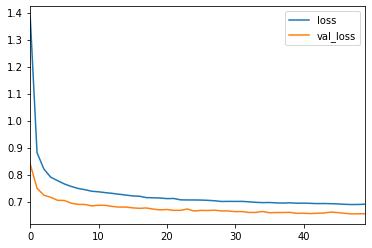

In [848]:
model_loss = pd.DataFrame(model.history.history)
model_loss[['loss', 'val_loss']].plot()

In [854]:
from sklearn.metrics import confusion_matrix, classification_report

In [855]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.60      0.60      3131
           1       0.52      0.43      0.47      1919
           2       0.48      0.59      0.53      2138
           3       0.90      0.89      0.90      7101
           4       0.80      0.84      0.82      3044
           5       0.75      0.77      0.76      3122
           6       0.81      0.83      0.82      7910
           7       0.67      0.23      0.34       952
           8       0.55      0.27      0.37      1060
           9       0.86      0.92      0.89      7380

    accuracy                           0.77     37757
   macro avg       0.69      0.64      0.65     37757
weighted avg       0.77      0.77      0.76     37757



In [852]:
confusion_matrix(y_test, predictions)

array([[1889,  137,  242,    2,   13,    8,  442,    5,   17,  376],
       [ 229,  830,  403,    0,   82,   13,   58,   53,   19,  232],
       [ 213,  122, 1257,    1,    8,   59,   69,    2,   62,  345],
       [   3,    0,    1, 6328,  207,  216,  331,    0,    1,   14],
       [   3,   72,    4,  104, 2563,  178,   93,   15,    3,    9],
       [  10,    2,   58,  274,   49, 2412,  269,    1,   29,   18],
       [ 527,   34,   64,  297,  119,  190, 6533,   25,   46,   75],
       [  47,  297,   57,    0,  160,   16,   80,  220,   57,   18],
       [  77,   14,  347,    4,   10,  126,  144,    8,  290,   40],
       [ 182,   92,  198,   18,    9,   14,   78,    0,    2, 6787]],
      dtype=int64)

In [869]:
import random
random.seed(1)
random_ind = random.randint(0, len(df))

new_customer = df.drop(['Position', 'Label'], axis=1).loc[random_ind]
model.predict_classes(new_customer.values.reshape(1, 41))


array([3], dtype=int64)

In [870]:
df.loc[random_ind , ['Position', 'Label']]


Position    AttackingMidRight
Label                       2
Name: 17611, dtype: object

In [872]:
sorted(pos_list)


['AttackingMidCentral',
 'AttackingMidLeft',
 'AttackingMidRight',
 'DefenderCentral',
 'DefenderLeft',
 'DefenderRight',
 'MidfielderCentral',
 'MidfielderLeft',
 'MidfielderRight',
 'Striker']